In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('score_updated.csv')
x = df['Hours'].values.reshape(-1, 1)
y = df['Scores'].values

print("Shape X:", x.shape)  # Harus (96, 1) atau (n_data, 1)
print("Shape Y:", y.shape)

Shape X: (96, 1)
Shape Y: (96,)


In [6]:
# 2. Split Data (80% Train, 20% Test)
# random_state=42 digunakan agar hasil acakan tetap sama setiap kali dijalankan
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

print("Shape X Train:", x_train.shape)
print("Shape X Test :", x_test.shape)

Shape X Train: (76, 1)
Shape X Test : (20, 1)


In [7]:
# 3. Training Model (Hanya menggunakan data Train)
model = LinearRegression()
model.fit(x_train, y_train)

# Menampilkan Slope dan Intercept dari hasil belajar data train
m = model.coef_[0]
c = model.intercept_
print(f"\nSlope (m): {m:.2f}")
print(f"Intercept (c): {c:.2f}")
print(f"Persamaan: y = {c:.2f} + {m:.2f}x")


Slope (m): 9.84
Intercept (c): 2.44
Persamaan: y = 2.44 + 9.84x


In [8]:
# 4. Prediksi & Evaluasi (Menggunakan data Test)
y_pred = model.predict(x_test)

# Menghitung error antara Kunci Jawaban (y_test) dan Jawaban Model (y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Evaluasi pada Data Test ===")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


=== Evaluasi pada Data Test ===
MAE: 3.3702
MSE: 17.0074
RMSE: 4.1240
R² Score: 0.9709


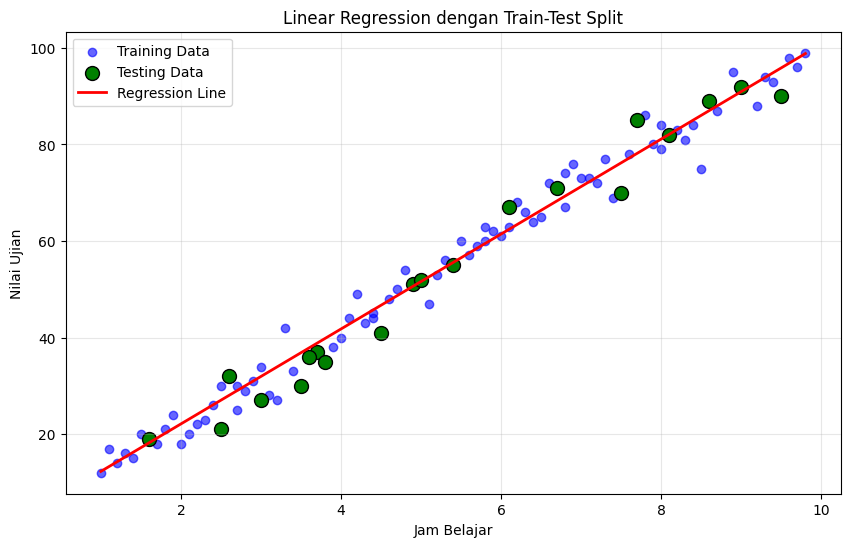

In [9]:
# 5. Visualisasi
plt.figure(figsize=(10, 6))

# Plot Data Training (Warna Biru)
plt.scatter(x_train, y_train, color='blue', label='Training Data', alpha=0.6)

# Plot Data Testing (Warna Hijau - untuk melihat seberapa dekat dengan garis)
plt.scatter(x_test, y_test, color='green',
            label='Testing Data', edgecolor='black', s=100)

# Garis Regresi (Berdasarkan model yang dilatih)
# Kita buat garis sepanjang rentang data x
line_x = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
line_y = model.predict(line_x)
plt.plot(line_x, line_y, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Jam Belajar')
plt.ylabel('Nilai Ujian')
plt.title('Linear Regression dengan Train-Test Split')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [12]:
# Prediksi nilai untuk 10 jam belajar
jam_belajar = np.array([[2]])
prediksi_baru = model.predict(jam_belajar)
print(f"\nJika belajar 10 jam, prediksi nilainya: {prediksi_baru[0]:.2f}")


Jika belajar 10 jam, prediksi nilainya: 22.11
